# Donor Choose : Logistic Regression

In [1]:
import os

os.chdir('E:\Datasets\DonorChoose')

In [2]:
import pandas as pd

In [3]:
donor = pd.read_csv('cleandonor4.csv')

donor.head(2)

,teacher_prefix,school_state,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategory,cleanEssay,price,quantity,cleanProjectGradeCategory,project_title
0,Mrs.,IN,0,0,Literacy-Language,ESL Literacy,My students are English learners that are work...,154.6,23,PreK-Two,Educational Support for English Learners at Home
1,Mr.,FL,7,1,History-Civics Health-Sports,Civics-Government TeamSports,Our students arrive to our school eager to lea...,299.0,1,Six-Eight,Wanted: Projector for Hungry Learners


In [4]:
# We are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [5]:
from tqdm import tqdm
ftitle = [] 

for sen in tqdm( donor['project_title'].values ): 
    strY = " "

    for w in sen.lower().split():
        if w not in stopwords:
            strY = strY + w + " "

    ftitle.append( strY.strip() )

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:01<00:00, 55811.50it/s]


In [6]:
donor.drop(['project_title'], axis=1, inplace=True)
donor['cleanTitle'] = ftitle

In [7]:
donor.head(2)

,teacher_prefix,school_state,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategory,cleanEssay,price,quantity,cleanProjectGradeCategory,cleanTitle
0,Mrs.,IN,0,0,Literacy-Language,ESL Literacy,My students are English learners that are work...,154.6,23,PreK-Two,educational support english learners home
1,Mr.,FL,7,1,History-Civics Health-Sports,Civics-Government TeamSports,Our students arrive to our school eager to lea...,299.0,1,Six-Eight,wanted: projector hungry learners


In [8]:
nan = donor[ donor['teacher_prefix'].isnull() ]
nan

,teacher_prefix,school_state,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategory,cleanEssay,price,quantity,cleanProjectGradeCategory,cleanTitle


In [9]:
donor = donor[0 : 50000]

In [10]:
donor.shape

(50000, 11)

In [11]:
Y = donor['project_is_approved']

In [12]:
donor.drop(['project_is_approved'], axis = 1, inplace = True)

In [13]:
donor.shape

(50000, 10)

In [14]:
X = donor

### Splitting Data

In [151]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split( X, Y, test_size = 0.33, stratify = Y) # Spliting into Test and Train

# stratify : we need to pass array containing class label as an argument to stratify

xtrain, xcv, ytrain, ycv = train_test_split( xtrain, ytrain, test_size = 0.33, stratify = ytrain )

In [16]:
print( xtrain.shape )
print( xcv.shape )
print( xtest.shape )

print( ytrain.shape )
print( ycv.shape )
print( ytest.shape )

(22445, 10)
(11055, 10)
(16500, 10)
(22445,)
(11055,)
(16500,)


## Creating Data Matrix

### Essay BOW

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer( min_df = 10, ngram_range=(1,2), max_features = 5000 )
# ngram_range : The lower and upper boundary of the range of n-values for different n-grams to be extracted.
# max_features : build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.

vect.fit( xtrain['cleanEssay'].values )
# vect.fit( text ): Means that internally it is only learning the vocabulary of `Text` i.e. unique n-grams

# THE VOCABULARY SHOULD BUILT ONLY WITH THE WORDS OF TRAIN DATA

xtrEssayBOW = vect.transform( xtrain['cleanEssay'].values ) 
xcvEssayBOW = vect.transform( xcv['cleanEssay'].values ) 
xteEssayBOW = vect.transform( xtest['cleanEssay'].values )

In [18]:
print( xtrEssayBOW.shape )
print( xcvEssayBOW.shape )
print( xteEssayBOW.shape )

(22445, 5000)
(11055, 5000)
(16500, 5000)


### Essay TFIDF

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

tfidfvect = TfidfVectorizer( min_df=10, max_features = 5000, ngram_range = (1,2) )
tfidfvect.fit( xtrain['cleanEssay'].values )

xtrEssayTFIDF = tfidfvect.transform( xtrain['cleanEssay'].values )
xcvEssayTFIDF = tfidfvect.transform( xcv['cleanEssay'].values )
xteEssayTFIDF = tfidfvect.transform( xtest['cleanEssay'].values )

print( xtrEssayTFIDF.shape )
print( xcvEssayTFIDF.shape )
print( xteEssayTFIDF.shape )

(22445, 5000)
(11055, 5000)
(16500, 5000)


### Essay Word 2 Vec 

In [20]:
# Function Creating a list that contains all the words in the data column

def stow( data ):
    sentence = []

    for sen in tqdm( data.values ):
        fsentence = []
    
        for w in sen.split():
            for cw in w.split():
            
                if cw.isalpha():
                    fsentence.append( cw.lower() )
                else:
                    continue
        sentence.append( fsentence )
    return sentence

In [21]:
import gensim

In [22]:
xtrw = stow( xtrain['cleanEssay'] ) # List of words for xtrain

print( len( xtrw ) )

xtrmodel = gensim.models.Word2Vec( xtrw, min_count = 5, size =50, workers = 4 )
# min_count : If a word dosent apper more then the value assigned do't construct w2v for it
# size: dimension of vector to be constructed
# workers: If you hav a multi cores you can set it to 4 for performence

xtrwords = list( xtrmodel.wv.vocab )
len( xtrwords )

100%|██████████████████████████████████████████████████████████████████████████| 22445/22445 [00:04<00:00, 5162.35it/s]


22445


10727

In [23]:
# For Cross validation

xcvw = stow( xcv['cleanEssay'] )

print( len( xcvw ) )

xcvmodel = gensim.models.Word2Vec( xcvw, min_count = 5, size =50, workers = 4 )

xcvwords = list( xcvmodel.wv.vocab )
len( xcvwords )

100%|██████████████████████████████████████████████████████████████████████████| 11055/11055 [00:02<00:00, 4951.11it/s]


11055


8121

In [24]:
# For Test

xtew = stow( xtest['cleanEssay'] )

print( len( xtew ) )

xtemodel = gensim.models.Word2Vec( xtew, min_count = 5, size =50, workers = 4 )

xtewords = list( xtemodel.wv.vocab )
len( xtewords )

100%|██████████████████████████████████████████████████████████████████████████| 16500/16500 [00:03<00:00, 4763.29it/s]


16500


9511

### Essay Avg Word 2 vec

In [25]:
import numpy as np


def avgw2v( data, words, model ):
    sentV = [] # average word 2 vec for each essay is stored in this

    for sent in tqdm( data ):
    
        svec = np.zeros(50)
        cnw = 0
    
        for w in sent:
            if w in words:
                vec = model.wv[ w ]  # Computing word 2 vec
                svec += vec     # Add it to the svec
                cnw += 1
            
        if cnw != 0:        
            svec /= cnw  # Averaging with the count of number of words with valid vector in the Essay
        sentV.append( svec )
    
    return sentV

In [26]:
# For Train
xtrAW2V = np.asarray( avgw2v( xtrw, xtrwords, xtrmodel ) )

xtrAW2V[20]

xtrAW2V.shape

100%|███████████████████████████████████████████████████████████████████████████| 22445/22445 [02:22<00:00, 157.70it/s]


(22445, 50)

In [27]:
xcvAW2V = np.asarray( avgw2v( xcvw, xcvwords, xcvmodel ) )

xcvAW2V.shape

100%|███████████████████████████████████████████████████████████████████████████| 11055/11055 [01:02<00:00, 177.44it/s]


(11055, 50)

In [28]:
xteAW2V = np.asarray( avgw2v( xtew, xtewords, xtemodel ) )

xteAW2V.shape

100%|███████████████████████████████████████████████████████████████████████████| 16500/16500 [01:47<00:00, 152.95it/s]


(16500, 50)

### Essay TFIDF WW2V

In [29]:
print( tfidfvect.get_feature_names()[1000:1020] )
len( tfidfvect.get_feature_names() )

['comfortable and', 'comfortably', 'comfy', 'coming', 'coming from', 'coming to', 'committed', 'committed to', 'common', 'common core', 'communicate', 'communication', 'communities', 'community', 'community and', 'community in', 'community is', 'community of', 'community that', 'community we']


5000

In [30]:
essayFeatures = tfidfvect.get_feature_names()  # Tf idf words/ col names

In [31]:
def ww2v( data, model, TFIDF, feat = essayFeatures ):
    
    essayWw2v = []  # the Tfidf weighted w2v for each sentence is stored here
    row = 0

    for sent in tqdm( data ):
        sv = np.zeros( 50 )  # as word vectors are of zero length
        ws = 0  # ws : weight sum, num of words with a valid vector in the sentence/review

        for w in sent:      

            try:
                vec = model.wv[ w ]
                tfidf = TFIDF[ row, feat.index( w ) ]

                sv += ( vec * tfidf )
                ws += tfidf

            except:
                pass

        if ws != 0:
            sv /= ws
        essayWw2v.append( sv )
        row += 1

    return essayWw2v

In [32]:
# For train
xtrWW2V = np.asarray( ww2v( xtrw, xtrmodel, xtrEssayTFIDF ) )

xtrWW2V.shape

100%|████████████████████████████████████████████████████████████████████████████| 22445/22445 [11:19<00:00, 33.02it/s]


(22445, 50)

In [33]:
xcvWW2V = np.asarray( ww2v( xcvw, xcvmodel, xcvEssayTFIDF ) )

xcvWW2V.shape

100%|████████████████████████████████████████████████████████████████████████████| 11055/11055 [05:24<00:00, 34.08it/s]


(11055, 50)

In [34]:
xteWW2V = np.asarray( ww2v( xtew, xtemodel, xteEssayTFIDF ) )

xteWW2V.shape

100%|████████████████████████████████████████████████████████████████████████████| 16500/16500 [08:08<00:00, 33.77it/s]


(16500, 50)

### ProjectTitle BOW

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer( min_df = 10, ngram_range = (1,2), max_features = 5000 )

vect.fit( xtrain['cleanTitle'].values )

xtrTitleBOW = vect.transform( xtrain['cleanTitle'].values )
xcvTitleBOW = vect.transform( xcv['cleanTitle'].values )
xteTitleBOW = vect.transform( xtest['cleanTitle'].values )

print( xtrTitleBOW.shape )
print( xcvTitleBOW.shape )
print( xteTitleBOW.shape )

(22445, 1650)
(11055, 1650)
(16500, 1650)


### Project title TFIDF

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

tfidfvect = TfidfVectorizer( min_df=10, ngram_range = (1,2), max_features = 5000 )
tfidfvect.fit( xtrain['cleanTitle'].values )

xtrTitleTFIDF = tfidfvect.transform( xtrain['cleanTitle'].values )
xcvTitleTFIDF = tfidfvect.transform( xcv['cleanTitle'].values )
xteTitleTFIDF = tfidfvect.transform( xtest['cleanTitle'].values )

print( xtrTitleTFIDF.shape )
print( xcvTitleTFIDF.shape )
print( xteTitleTFIDF.shape )

(22445, 1650)
(11055, 1650)
(16500, 1650)


### Project title Word 2 Vec

In [37]:
# For Train

xtrTitlew = stow( xtrain['cleanTitle'] )  # stow : is a defined by me that coverts a list of sentences to words

print( len( xtrTitlew ) )

xtrTitlemodel = gensim.models.Word2Vec( xtrTitlew, min_count = 5, size =50, workers = 4 )

xtrTitlewords = list( xtrTitlemodel.wv.vocab )
len( xtrTitlewords )

100%|█████████████████████████████████████████████████████████████████████████| 22445/22445 [00:00<00:00, 48445.31it/s]


22445


1655

In [38]:
# For Cross Validation

xcvTitlew = stow( xcv['cleanTitle'] )

print( len( xcvTitlew ) )

xcvTitlemodel = gensim.models.Word2Vec( xcvTitlew, min_count = 5, size =50, workers = 4 )

xcvTitlewords = list( xcvTitlemodel.wv.vocab )
len( xcvTitlewords )

100%|████████████████████████████████████████████████████████████████████████| 11055/11055 [00:00<00:00, 166594.32it/s]


11055


988

In [39]:
# For Test

xteTitlew = stow( xtest['cleanTitle'] )

print( len( xteTitlew ) )

xteTitlemodel = gensim.models.Word2Vec( xteTitlew, min_count = 5, size =50, workers = 4 )

xteTitlewords = list( xteTitlemodel.wv.vocab )
len( xteTitlewords )

100%|████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 192123.13it/s]


16500


1339

### Project title Avg word 2 vec

In [40]:
# For Train

xtrTitleAW2V = np.asarray( avgw2v( xtrTitlew, xtrTitlewords, xtrTitlemodel ) )

xtrTitleAW2V.shape

100%|█████████████████████████████████████████████████████████████████████████| 22445/22445 [00:01<00:00, 15999.76it/s]


(22445, 50)

In [41]:
# For Cross validation

xcvTitleAW2V = np.asarray( avgw2v( xcvTitlew, xcvTitlewords, xcvTitlemodel ) )

xcvTitleAW2V.shape

100%|█████████████████████████████████████████████████████████████████████████| 11055/11055 [00:00<00:00, 18194.13it/s]


(11055, 50)

In [42]:
# For Test

xteTitleAW2V = np.asarray( avgw2v( xteTitlew, xteTitlewords, xteTitlemodel ) )

xteTitleAW2V.shape

100%|█████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 16789.33it/s]


(16500, 50)

### Project title TFIDF WW2V

In [43]:
print( tfidfvect.get_feature_names()[0:30] )
len( tfidfvect.get_feature_names() )

['05', '10', '101', '16', '1st', '1st grade', '1st graders', '2016', '2017', '21st', '21st century', '2nd', '2nd grade', '2nd graders', '3d', '3d printer', '3d printing', '3doodler', '3rd', '3rd grade', '3rd graders', '4th', '4th grade', '4th graders', '5th', '5th grade', '5th graders', '6th', '6th grade', '7th']


1650

In [44]:
titlefeatures = tfidfvect.get_feature_names()

In [45]:
# For train
xtrTitleWW2V = np.asarray( ww2v( xtrTitlew, xtrTitlemodel, xtrTitleTFIDF, titlefeatures ) )

xtrTitleWW2V.shape

100%|██████████████████████████████████████████████████████████████████████████| 22445/22445 [00:04<00:00, 4922.27it/s]


(22445, 50)

In [46]:
# For Cross validation
xcvTitleWW2V = np.asarray( ww2v( xcvTitlew, xcvTitlemodel, xcvTitleTFIDF, titlefeatures ) )

xcvTitleWW2V.shape

100%|██████████████████████████████████████████████████████████████████████████| 11055/11055 [00:02<00:00, 5019.08it/s]


(11055, 50)

In [47]:
# For Test
xteTitleWW2V = np.asarray( ww2v( xteTitlew, xteTitlemodel, xteTitleTFIDF, titlefeatures ) )

xteTitleWW2V.shape

100%|██████████████████████████████████████████████████████████████████████████| 16500/16500 [00:03<00:00, 5021.27it/s]


(16500, 50)

### <br> State

In [48]:
vectorizer = CountVectorizer()

vectorizer.fit( xtrain['school_state'].values )

xtrState = vectorizer.transform( xtrain['school_state'].values )
xcvState = vectorizer.transform( xcv['school_state'].values )
xteState = vectorizer.transform( xtest['school_state'].values )

print( xtrState.shape )
print( xcvState.shape )
print( xteState.shape )

(22445, 51)
(11055, 51)
(16500, 51)


In [49]:
print( vectorizer.get_feature_names() )

['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


### Teacher prefix

In [50]:
vectorizer = CountVectorizer()

vectorizer.fit( xtrain['teacher_prefix'].values )

xtrPrefix = vectorizer.transform( xtrain['teacher_prefix'].values )
xcvPrefix = vectorizer.transform( xcv['teacher_prefix'].values )
xtePrefix = vectorizer.transform( xtest['teacher_prefix'].values )

print( xtrPrefix.shape )
print( xcvPrefix.shape )
print( xtePrefix.shape )

(22445, 6)
(11055, 6)
(16500, 6)


In [51]:
print( vectorizer.get_feature_names() )

['dr', 'missing', 'mr', 'mrs', 'ms', 'teacher']


### Category

In [52]:
vectorizer = CountVectorizer()

vectorizer.fit( xtrain['clean_categories'].values )

xtrCat = vectorizer.transform( xtrain['clean_categories'].values )
xcvCat = vectorizer.transform( xcv['clean_categories'].values )
xteCat = vectorizer.transform( xtest['clean_categories'].values )

print( xtrCat.shape )
print( xcvCat.shape )
print( xteCat.shape )

(22445, 15)
(11055, 15)
(16500, 15)


In [53]:
print( vectorizer.get_feature_names() )

['appliedlearning', 'arts', 'care', 'civics', 'health', 'history', 'hunger', 'language', 'literacy', 'math', 'music', 'science', 'specialneeds', 'sports', 'warmth']


### Sub category

In [54]:
vectorizer = CountVectorizer()

vectorizer.fit( xtrain['clean_subcategory'].values )

xtrSubCat = vectorizer.transform( xtrain['clean_subcategory'].values )
xcvSubCat = vectorizer.transform( xcv['clean_subcategory'].values )
xteSubCat = vectorizer.transform( xtest['clean_subcategory'].values )

print( xtrSubCat.shape )
print( xcvSubCat.shape )
print( xteSubCat.shape )

(22445, 37)
(11055, 37)
(16500, 37)


In [55]:
print( vectorizer.get_feature_names() )

['appliedsciences', 'care', 'careerprep', 'charactereducation', 'civics', 'college', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'fitness', 'foreignlanguages', 'geography', 'government', 'gym', 'health', 'history', 'hunger', 'lifescience', 'literacy', 'literature', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth', 'wellness', 'writing']


### Project Grade Category

In [56]:
vectGCat = CountVectorizer()

vectGCat.fit( xtrain['cleanProjectGradeCategory'].values )

xtrGCat = vectGCat.transform( xtrain['cleanProjectGradeCategory'].values )
xcvGCat = vectGCat.transform( xcv['cleanProjectGradeCategory'].values )
xteGCat = vectGCat.transform( xtest['cleanProjectGradeCategory'].values )

print( xtrGCat.shape )
print( xcvGCat.shape )
print( xteGCat.shape )

(22445, 8)
(11055, 8)
(16500, 8)


### Price

In [57]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

# norm.fit( xtrain['price'].values ) # gives error : Expected 2D array, got 1D array instead
norm.fit( xtrain['price'].values.reshape(-1,1) )

xtrPrice = norm.transform( xtrain['price'].values.reshape(-1,1) )
xcvPrice = norm.transform( xcv['price'].values.reshape(-1,1) )
xtePrice = norm.transform( xtest['price'].values.reshape(-1,1) )

print( xtrPrice.shape )
print( xcvPrice.shape )
print( xtePrice.shape )

(22445, 1)
(11055, 1)
(16500, 1)


### Previously Posted projects

In [58]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

# norm.fit( xtrain['price'].values ) # gives error : Expected 2D array, got 1D array instead
norm.fit( xtrain['teacher_number_of_previously_posted_projects'].values.reshape(-1,1) )

xtrPrev = norm.transform( xtrain['teacher_number_of_previously_posted_projects'].values.reshape(-1,1) )
xcvPrev = norm.transform( xcv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1) )
xtePrev = norm.transform( xtest['teacher_number_of_previously_posted_projects'].values.reshape(-1,1) )

print( xtrPrev.shape )
print( xcvPrev.shape )
print( xtePrev.shape )

(22445, 1)
(11055, 1)
(16500, 1)


### Quantity

In [59]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

# norm.fit( xtrain['price'].values ) # gives error : Expected 2D array, got 1D array instead
norm.fit( xtrain['quantity'].values.reshape(-1,1) )

xtrQuan = norm.transform( xtrain['quantity'].values.reshape(-1,1) )
xcvQuan = norm.transform( xcv['quantity'].values.reshape(-1,1) )
xteQuan = norm.transform( xtest['quantity'].values.reshape(-1,1) )

print( xtrQuan.shape )
print( xcvQuan.shape )
print( xteQuan.shape )

(22445, 1)
(11055, 1)
(16500, 1)


## Merging Features

### Set 1

In [60]:
from scipy.sparse import hstack

xtr1 = hstack(( xtrEssayBOW, xtrTitleBOW, xtrState, xtrPrefix, xtrCat, xtrSubCat, xtrGCat, xtrPrice, xtrPrev, xtrQuan )).tocsr()
xcv1 = hstack(( xcvEssayBOW, xcvTitleBOW, xcvState, xcvPrefix, xcvCat, xcvSubCat, xcvGCat, xcvPrice, xcvPrev, xcvQuan )).tocsr()
xte1 = hstack(( xteEssayBOW, xteTitleBOW, xteState, xtePrefix, xteCat, xteSubCat, xteGCat, xtePrice, xtePrev, xteQuan )).tocsr()

print( xtr1.shape, ytrain.shape )
print( xcv1.shape, ycv.shape )
print( xte1.shape, ytest.shape )

(22445, 6770) (22445,)
(11055, 6770) (11055,)
(16500, 6770) (16500,)


### Set 2

In [61]:
from scipy.sparse import hstack

xtr2 = hstack(( xtrEssayTFIDF, xtrTitleTFIDF, xtrState, xtrPrefix, xtrCat, xtrSubCat, xtrGCat, xtrPrice, xtrPrev, xtrQuan )).tocsr()
xcv2 = hstack(( xcvEssayTFIDF, xcvTitleTFIDF, xcvState, xcvPrefix, xcvCat, xcvSubCat, xcvGCat, xcvPrice, xcvPrev, xcvQuan )).tocsr()
xte2 = hstack(( xteEssayTFIDF, xteTitleTFIDF, xteState, xtePrefix, xteCat, xteSubCat, xteGCat, xtePrice, xtePrev, xteQuan )).tocsr()

print( xtr2.shape, ytrain.shape )
print( xcv2.shape, ycv.shape )
print( xte2.shape, ytest.shape )

(22445, 6770) (22445,)
(11055, 6770) (11055,)
(16500, 6770) (16500,)


### Set 3

In [62]:
from scipy.sparse import hstack

xtr3 = hstack(( xtrAW2V, xtrTitleAW2V, xtrState, xtrPrefix, xtrCat, xtrSubCat, xtrGCat, xtrPrice, xtrPrev, xtrQuan )).tocsr()
xcv3 = hstack(( xcvAW2V, xcvTitleAW2V, xcvState, xcvPrefix, xcvCat, xcvSubCat, xcvGCat, xcvPrice, xcvPrev, xcvQuan )).tocsr()
xte3 = hstack(( xteAW2V, xteTitleAW2V, xteState, xtePrefix, xteCat, xteSubCat, xteGCat, xtePrice, xtePrev, xteQuan )).tocsr()

print( xtr3.shape, ytrain.shape )
print( xcv3.shape, ycv.shape )
print( xte3.shape, ytest.shape )

(22445, 220) (22445,)
(11055, 220) (11055,)
(16500, 220) (16500,)


### Set 4

In [63]:
from scipy.sparse import hstack

xtr4 = hstack(( xtrWW2V, xtrTitleWW2V, xtrState, xtrPrefix, xtrCat, xtrSubCat, xtrGCat, xtrPrice, xtrPrev, xtrQuan )).tocsr()
xcv4 = hstack(( xcvWW2V, xcvTitleWW2V, xcvState, xcvPrefix, xcvCat, xcvSubCat, xcvGCat, xcvPrice, xcvPrev, xcvQuan )).tocsr()
xte4 = hstack(( xteWW2V, xteTitleWW2V, xteState, xtePrefix, xteCat, xteSubCat, xteGCat, xtePrice, xtePrev, xteQuan )).tocsr()

print( xtr4.shape, ytrain.shape )
print( xcv4.shape, ycv.shape )
print( xte4.shape, ytest.shape )

(22445, 220) (22445,)
(11055, 220) (11055,)
(16500, 220) (16500,)


In [64]:
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix


### Function to Apply Logistic Regression on different C & finding best C using GridSearchCV() 

In [65]:
def batchPredict( data, classifier ): # Predict the probablity of data points in batch i.e; some data points at once 
    
    yPred = []
    
    loop = data.shape[0] - data.shape[0] % 1000   # data.shape[0] : no of rows in data matrix
    # for ex data shape = 4489 then loop = 4489 - 4489%1000 = 4489 - 489 = 4000 
    # Now we can divide our loop into 4 interval of 1000s and one remaining 489
    # ie; 1-1000 in 1st iteration 1000-2000 in 2nd iteration 2000-3000 in 3rd 3000-4000 in 4th and 4000-4489 in the last iteraion
    
    for i in range( 0, loop, 1000 ):
        # If loop = 4000 Computes proba for 0 - 4000 in 4 iterations
       
        yPred.extend( classifier.predict_proba( data[i : i+1000] )[ :, 1] ) # [ :, 1] : All row Only 1 col
        # predict_proba : Return probability estimates for the test data X.

    yPred.extend( classifier.predict_proba( data[ loop : ] )[ :, 1 ] )
    # computes probab for remaining points

    return yPred

In [80]:
from sklearn.metrics import roc_auc_score

def bestC( xtr, xcv, ytr, ycv ):
    
    C =  [ 10**-5, 10**-4, 10**-3, 10**-2, 0.1, 1, 10, 100 ]     # C = 1 / Lambda

    trAUC = []
    cvAUC = []
    
    
    print(' '*4,'- First -', ' '*4,'- Second -', ' '*4,'- Third -', ' '*4,'- Fourth -', ' '*4,'- Fifth -', ' '*4,'- Sixth -'
         , ' '*4,'- Seven -', ' '*4,'- Eight -')


    for i in C:

        lr = LogisticRegression( C = i, class_weight = 'balanced' )
        lr.fit(xtr, ytr)

        ytrPred = batchPredict( xtr, lr )    
        ycvPred = batchPredict( xcv, lr )

        # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
        # not the predicted outputs 

        trAUC.append( roc_auc_score( ytrain, ytrPred ))
        cvAUC.append( roc_auc_score( ycv, ycvPred ))

        print('#'*14, end ='  ' )

    plt.figure( figsize = ( 15, 5 ) )

    plt.plot( np.log(C), trAUC, label = 'Train AUC')
    plt.plot( np.log(C), cvAUC, label = 'CV AUC')

    plt.scatter( np.log(C), trAUC, label = 'Train AUC points')
    plt.scatter( np.log(C), cvAUC, label = 'CV AUC points')

    plt.legend()
    plt.xlabel("C: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.grid()
    plt.show()

### <br>Function to convert Predicted Score to Binary and creating Confusion Matrix

In [74]:
def predictCM( probab, threshold, fpr, tpr ):
    
    t = threshold[ np.argmax( fpr*( 1 - tpr ) ) ]  # returns the threshold val for the point with max fpr(1-tpr) value
    # fpr*( 1 - tpr ) will be high if fpr is high and tpr is low
    # argmax : Returns the indices of the maximum val along an axis
    
    print(" The maximum value of tpr*(1-fpr) = ", max( tpr*(1-fpr) ), " for threshold = ", np.round(t,3))
    
    pred = []
    for i in probab: # i = Probability for all data points
        if i >= t:   #  if Probablity of a point is >= the Threshold value i,e; Threshold at index of max val of fpr(1-tpr) 
            pred.append(1)
        else:
            pred.append(0)
            
    return pred

In [75]:
import seaborn as sns

def cm( ytr, yte, yTrainPred, trThreshold, trFPR, trTPR, yTestPred, teThreshold, teFPR, teTPR, sno ):
    
    print("Confusion Matrix for Train of Set ", sno)
    
    predicted = predictCM( yTrainPred, trThreshold, trFPR, trTPR )
    cmtr = confusion_matrix( ytr, predicted )
    print( cmtr  )

    plt.figure( figsize = (8,6) )
    sns.set( font_scale = 1.4 ) #for label size
    sns.heatmap( cmtr,fmt=".1f", annot = True, annot_kws={"size": 18}, cmap='Blues_r' )# font size
    plt.show()
    plt.close()



    print("\n\nConfusion Matrix for Test 1 ")
    predicted = predictCM( yTestPred, teThreshold, teFPR, teTPR )

    cmte = confusion_matrix( yte, predicted )
    print( cmte )

    plt.figure( figsize = (8,6) )
    sns.set( font_scale = 1.4 ) #for label size
    sns.heatmap( cmte, fmt=".1f", annot = True, annot_kws={"size": 18}, cmap='Blues_r' )# font size
    plt.show()
    plt.close()

### <br>Function to Predict probabilistic score and appling roc_curve()

2.302585092994046

In [91]:
def roc( xtr, xte, ytr, yte, bestC, sno ):
    
    clf = LogisticRegression( C = bestC, class_weight = 'balanced'  )
    clf.fit( xtr, ytr )

    yTrainPred = batchPredict( xtr, clf )    
    yTestPred = batchPredict( xte, clf )

    trFPR, trTPR, trThreshold = roc_curve( ytr, yTrainPred ) # ytrain and YTrainPred must have same no. of points
    teFPR, teTPR, teThreshold = roc_curve(yte, yTestPred )

    # roc_curve() : Compute Receiver operating characteristic (ROC),
    # this implementation is restricted to the binary classification task.
    # roc_curve( yTrue, yScore ) : yTrue = True Binary labels, yScore = Target values Probablistic estimate, confidence values etc
    # The func returns 3 arrays : fpr = false Positive rates, tpr = True Positive rates, Threshold 

    plt.figure( figsize = (15, 5) )
    plt.plot( trFPR, trTPR, label="Train AUC = " + str( auc( trFPR, trTPR ) ) )
    plt.plot( teFPR, teTPR, label="Test AUC = " + str( auc( teFPR, teTPR ) ) )
    plt.legend()
    plt.xlabel("C: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS for Set "+str(sno))
    plt.grid()
    plt.show()
    
    
    cm( ytr, yte, yTrainPred, trThreshold, trFPR, trTPR, yTestPred, teThreshold, teFPR, teTPR, sno )

## Operations on Set 1

     - First -      - Second -      - Third -      - Fourth -      - Fifth -      - Sixth -      - Seven -      - Eight -
##############  ##############  ##############  ##############  ##############  ##############  ##############  ##############  

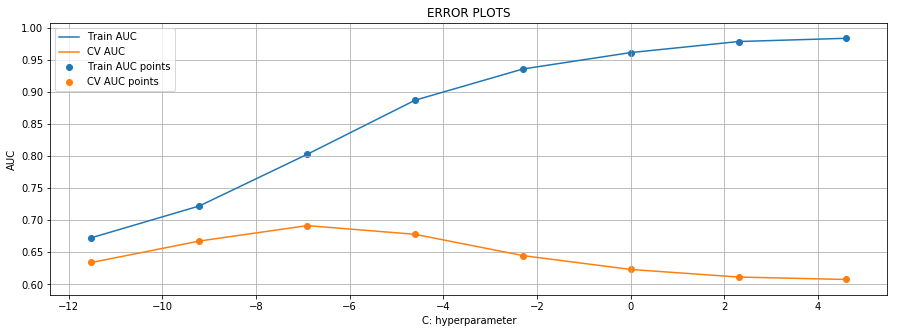

In [81]:
bestC( xtr1, xcv1, ytrain, ycv )

# C =  [ 10**-5, 10**-4, 10**-3, 10**-2, 0.1, 1, 10, 100 ]     
# C = 1 / Lambda

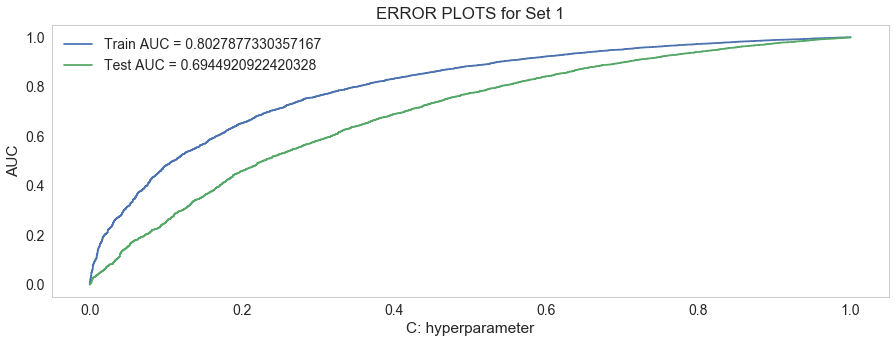

Confusion Matrix for Train of Set  1
 The maximum value of tpr*(1-fpr) =  0.5394818313977591  for threshold =  0.501
[[ 2579   884]
 [ 5377 13605]]


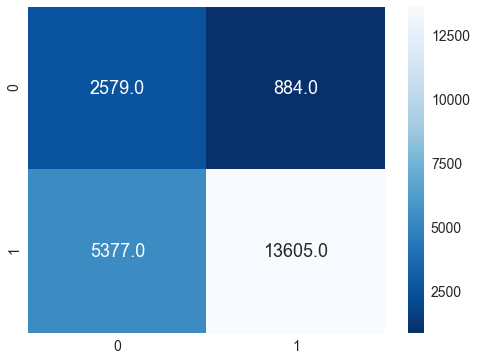



Confusion Matrix for Test 1 
 The maximum value of tpr*(1-fpr) =  0.4174356523921434  for threshold =  0.539
[[1741  805]
 [5617 8337]]


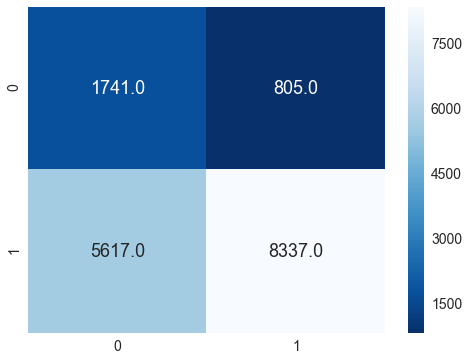

In [97]:
C = 10**-3
sns.set_style('whitegrid')
roc( xtr1, xte1, ytrain, ytest, C, 1 )

## Operations on Set 2

     - First -      - Second -      - Third -      - Fourth -      - Fifth -      - Sixth -      - Seven -      - Eight -
##############  ##############  ##############  ##############  ##############  ##############  ##############  ##############  

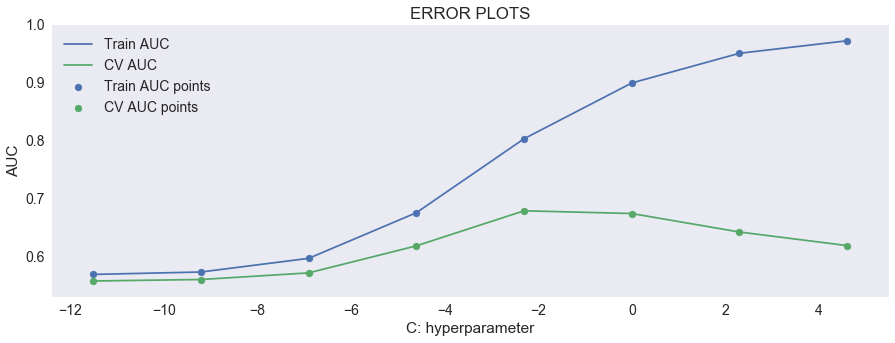

In [98]:
bestC( xtr2, xcv2, ytrain, ycv )


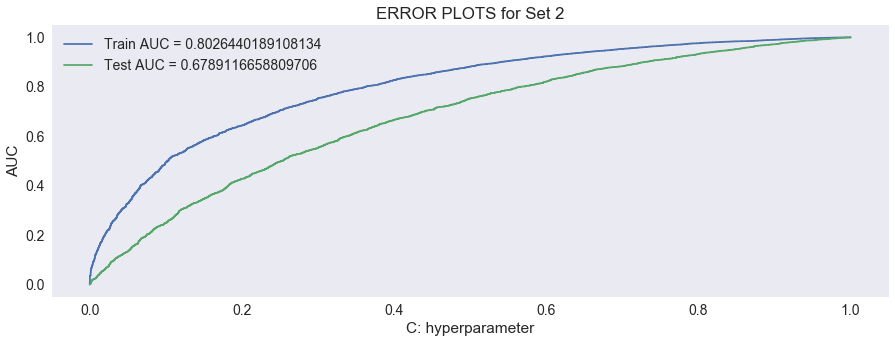

Confusion Matrix for Train of Set  2
 The maximum value of tpr*(1-fpr) =  0.5296432783274506  for threshold =  0.49
[[ 2436  1027]
 [ 4821 14161]]


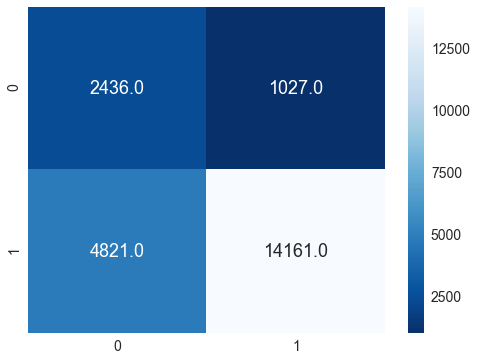



Confusion Matrix for Test 1 
 The maximum value of tpr*(1-fpr) =  0.402030445450831  for threshold =  0.52
[[1618  928]
 [5224 8730]]


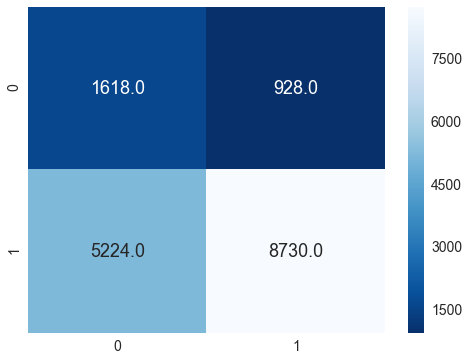

In [103]:
C = 10**-1

roc( xtr2, xte2, ytrain, ytest, C, 2 )

## Operations on Set 3

     - First -      - Second -      - Third -      - Fourth -      - Fifth -      - Sixth -      - Seven -      - Eight -
##############  ##############  ##############  ##############  ##############  ##############  ##############  ##############  

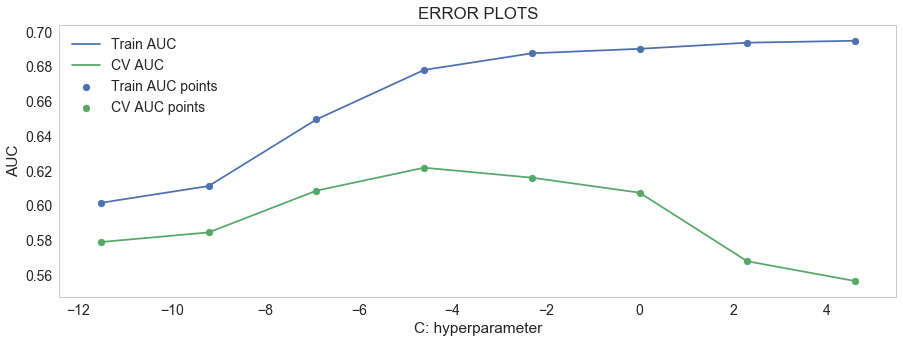

In [104]:
sns.set_style('whitegrid')
bestC( xtr3, xcv3, ytrain, ycv )

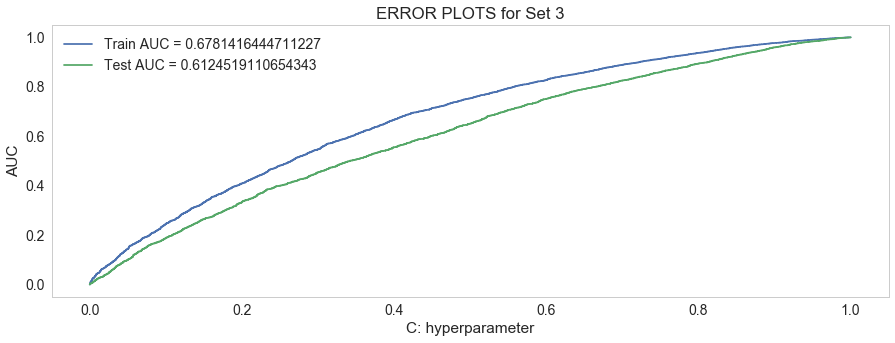

Confusion Matrix for Train of Set  3
 The maximum value of tpr*(1-fpr) =  0.4012303645081272  for threshold =  0.506
[[ 2257  1206]
 [ 7531 11451]]


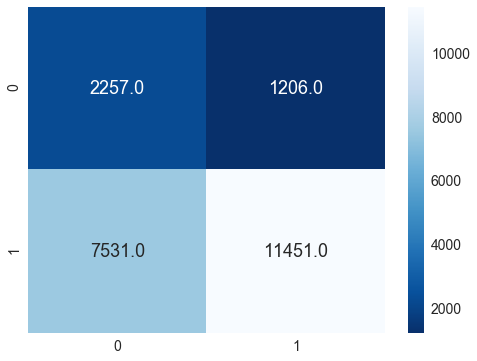



Confusion Matrix for Test 1 
 The maximum value of tpr*(1-fpr) =  0.33434775760238367  for threshold =  0.529
[[1415 1131]
 [5669 8285]]


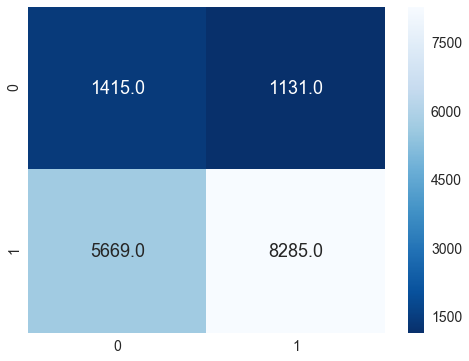

In [108]:
sns.set_style('whitegrid')

C = 10**-2

roc( xtr3, xte3, ytrain, ytest, C, 3 )

## Operations on Set 4

     - First -      - Second -      - Third -      - Fourth -      - Fifth -      - Sixth -      - Seven -      - Eight -
##############  ##############  ##############  ##############  ##############  ##############  ##############  ##############  

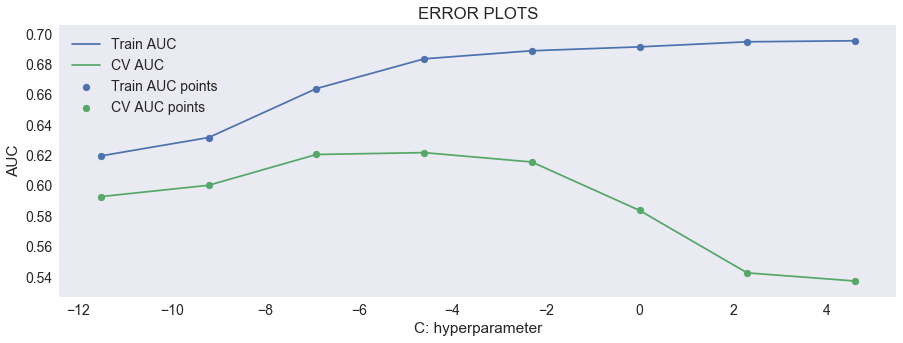

In [109]:
bestC( xtr4, xcv4, ytrain, ycv )

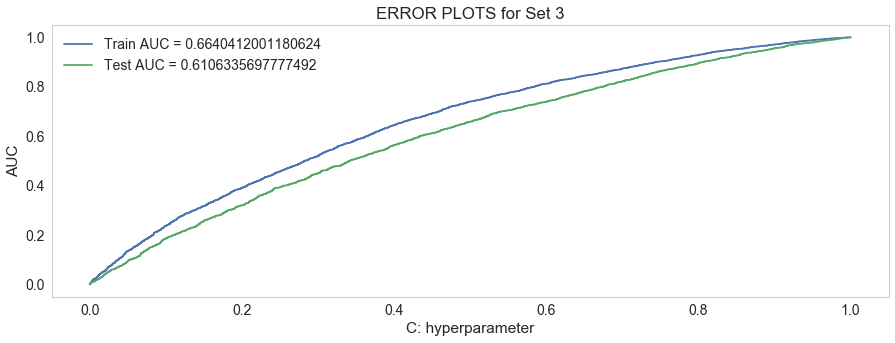

Confusion Matrix for Train of Set  3
 The maximum value of tpr*(1-fpr) =  0.38762743542349476  for threshold =  0.501
[[ 2215  1248]
 [ 7701 11281]]


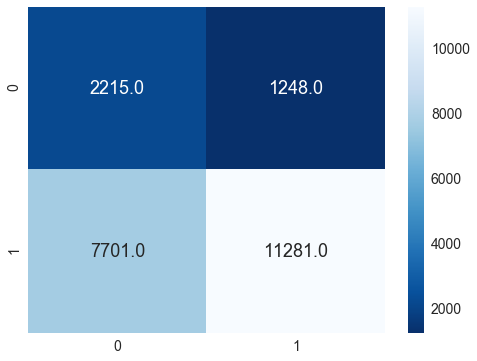



Confusion Matrix for Test 1 
 The maximum value of tpr*(1-fpr) =  0.34034594759281445  for threshold =  0.483
[[1562  984]
 [6366 7588]]


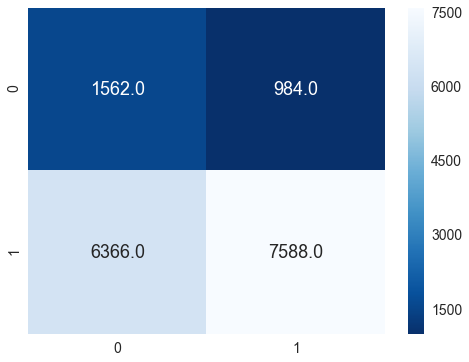

In [118]:
C = 10**-3
sns.set_style('whitegrid')

roc( xtr4, xte4, ytrain, ytest, C, 3 )

### Example of SentimentIntensityAnalyzer

In [119]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Use : nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

sent = 'The plot was good, but the characters are uncompelling and the dialog is not great'

ss = sid.polarity_scores( sen ) # returns a dictionary that contains : neg, neu, pos, compound as keys

# neg : negative polarity,  neu : Neutral Polarity,   pos : Positive polarity
# compound : is the sum of all of the lexicon ratings

# we can use these 4 things as features/attributes (neg, neu, pos, compound)

for key in ss:
    print('{0}: {1}, '.format( key, ss[key]), end='' )

D:\Anaconda\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 

In [120]:
sent = ['The plot was good, but the characters are uncompelling and the dialog is not great',\
                    'Sentiment analysis with VADER has never been this good.']

for sen in sent:
    ss = sid.polarity_scores( sen ) # returns a dictionary that contains : neg, neu, pos, compound as keys
    
    for key in ss:
        print('{0}: {1}, '.format( key, ss[key]), end='' )
    print()

# refer : http://t-redactyl.io/blog/2017/04/using-vader-to-handle-sentiment-analysis-with-social-media-text.html

neg: 0.327, neu: 0.579, pos: 0.094, compound: -0.7042, 
neg: 0.0, neu: 0.703, pos: 0.297, compound: 0.5228, 


### Calculating Sentiment scores of each Essay

In [121]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

s = SentimentIntensityAnalyzer()

neg = []
pos = []
neu = []
comp = []

for sentence in tqdm( donor['cleanEssay'].values ) :
    
    Sscore = s.polarity_scores( sentence )

    neg.append( Sscore['neg'] )
    pos.append( Sscore['pos'] )
    neu.append( Sscore['neu'] )
    comp.append( Sscore['compound'] )

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:18<00:00, 360.44it/s]


In [122]:
print( neg[0: 15] )
print( pos[0: 15] )
print( neu[0: 15] )
print( comp[0: 15] )

[0.008, 0.037, 0.058, 0.053, 0.016, 0.077, 0.028, 0.019, 0.007, 0.05, 0.068, 0.021, 0.005, 0.078, 0.023]
[0.08, 0.111, 0.183, 0.215, 0.087, 0.146, 0.172, 0.155, 0.249, 0.281, 0.177, 0.246, 0.228, 0.094, 0.142]
[0.912, 0.852, 0.759, 0.732, 0.897, 0.777, 0.8, 0.826, 0.744, 0.669, 0.755, 0.733, 0.767, 0.828, 0.835]
[0.9611, 0.9267, 0.9953, 0.9931, 0.9192, 0.9553, 0.9815, 0.9937, 0.9975, 0.9969, 0.9862, 0.9992, 0.9948, 0.4401, 0.972]


In [123]:
donor['neg'] = neg
donor['pos'] = pos
donor['neu'] = neu
donor['comp'] = comp

In [124]:
donor.head(2)

,teacher_prefix,school_state,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategory,cleanEssay,price,quantity,cleanProjectGradeCategory,cleanTitle,neg,pos,neu,comp
0,Mrs.,IN,0,Literacy-Language,ESL Literacy,My students are English learners that are work...,154.6,23,PreK-Two,educational support english learners home,0.008,0.080,0.912,0.9611
1,Mr.,FL,7,History-Civics Health-Sports,Civics-Government TeamSports,Our students arrive to our school eager to lea...,299.0,1,Six-Eight,wanted: projector hungry learners,0.037,0.111,0.852,0.9267


### Calculating no. of words in Title and Essay

In [125]:
def totalWords( col ):
    
    words = []
    for sent in tqdm( donor[col].values ) :
        w = 0
        
        for word in sent.split():
            w += 1
    
        words.append(w)
    
    return words

In [126]:
titleWords = totalWords('cleanTitle')

print( titleWords[0:15] )
len( titleWords )

100%|████████████████████████████████████████████████████████████████████████| 50000/50000 [00:00<00:00, 864430.66it/s]


[5, 4, 6, 2, 3, 7, 5, 2, 3, 3, 3, 5, 4, 3, 4]


50000

In [127]:
essayWords = totalWords('cleanEssay')

len( essayWords )

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:01<00:00, 29232.50it/s]


50000

In [128]:
donor['totalWordsTitle'] = titleWords

donor['totalWordsEssay'] = essayWords

In [129]:
donor.head(2)

,teacher_prefix,school_state,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategory,cleanEssay,price,quantity,cleanProjectGradeCategory,cleanTitle,neg,pos,neu,comp,totalWordsTitle,totalWordsEssay
0,Mrs.,IN,0,Literacy-Language,ESL Literacy,My students are English learners that are work...,154.6,23,PreK-Two,educational support english learners home,0.008,0.080,0.912,0.9611,5,274
1,Mr.,FL,7,History-Civics Health-Sports,Civics-Government TeamSports,Our students arrive to our school eager to lea...,299.0,1,Six-Eight,wanted: projector hungry learners,0.037,0.111,0.852,0.9267,4,223


In [130]:
X = donor

In [152]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split( X, Y, test_size = 0.33, stratify = Y) # Spliting into Test and Train

# stratify : we need to pass array containing class label as an argument to stratify

xtrain, xcv, ytrain, ycv = train_test_split( xtrain, ytrain, test_size = 0.33, stratify = ytrain )

### Neg

In [153]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

# norm.fit( xtrain['price'].values ) # gives error : Expected 2D array, got 1D array instead
norm.fit( xtrain['neg'].values.reshape(-1,1) )

xtrNeg = norm.transform( xtrain['neg'].values.reshape(-1,1) )
xcvNeg = norm.transform( xcv['neg'].values.reshape(-1,1) )
xteNeg = norm.transform( xtest['neg'].values.reshape(-1,1) )

print( xtrNeg.shape )
print( xcvNeg.shape )
print( xteNeg.shape )

(22445, 1)
(11055, 1)
(16500, 1)


### Pos

In [154]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

# norm.fit( xtrain['price'].values ) # gives error : Expected 2D array, got 1D array instead
norm.fit( xtrain['pos'].values.reshape(-1,1) )

xtrPos = norm.transform( xtrain['pos'].values.reshape(-1,1) )
xcvPos = norm.transform( xcv['pos'].values.reshape(-1,1) )
xtePos = norm.transform( xtest['pos'].values.reshape(-1,1) )

print( xtrPos.shape )
print( xcvPos.shape )
print( xtePos.shape )

(22445, 1)
(11055, 1)
(16500, 1)


### Neu

In [155]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

# norm.fit( xtrain['price'].values ) # gives error : Expected 2D array, got 1D array instead
norm.fit( xtrain['neu'].values.reshape(-1,1) )

xtrNeu = norm.transform( xtrain['neu'].values.reshape(-1,1) )
xcvNeu = norm.transform( xcv['neu'].values.reshape(-1,1) )
xteNeu = norm.transform( xtest['neu'].values.reshape(-1,1) )

print( xtrNeu.shape )
print( xcvNeu.shape )
print( xteNeu.shape )

(22445, 1)
(11055, 1)
(16500, 1)


### Comp

In [156]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

# norm.fit( xtrain['price'].values ) # gives error : Expected 2D array, got 1D array instead
norm.fit( xtrain['comp'].values.reshape(-1,1) )

xtrComp = norm.transform( xtrain['comp'].values.reshape(-1,1) )
xcvComp = norm.transform( xcv['comp'].values.reshape(-1,1) )
xteComp = norm.transform( xtest['comp'].values.reshape(-1,1) )

print( xtrComp.shape )
print( xcvComp.shape )
print( xteComp.shape )

(22445, 1)
(11055, 1)
(16500, 1)


### totalWordsTitle

In [157]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

# norm.fit( xtrain['price'].values ) # gives error : Expected 2D array, got 1D array instead
norm.fit( xtrain['totalWordsTitle'].values.reshape(-1,1) )

xtrTWT = norm.transform( xtrain['totalWordsTitle'].values.reshape(-1,1) )
xcvTWT = norm.transform( xcv['totalWordsTitle'].values.reshape(-1,1) )
xteTWT = norm.transform( xtest['totalWordsTitle'].values.reshape(-1,1) )

print( xtrTWT.shape )
print( xcvTWT.shape )
print( xteTWT.shape )

(22445, 1)
(11055, 1)
(16500, 1)


### totalWordsEssay

In [158]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

# norm.fit( xtrain['price'].values ) # gives error : Expected 2D array, got 1D array instead
norm.fit( xtrain['totalWordsEssay'].values.reshape(-1,1) )

xtrTWE = norm.transform( xtrain['totalWordsEssay'].values.reshape(-1,1) )
xcvTWE = norm.transform( xcv['totalWordsEssay'].values.reshape(-1,1) )
xteTWE = norm.transform( xtest['totalWordsEssay'].values.reshape(-1,1) )

print( xtrTWE.shape )
print( xcvTWE.shape )
print( xteTWE.shape )

(22445, 1)
(11055, 1)
(16500, 1)


## Set 5

In [159]:
# Set 5
from scipy.sparse import hstack

xtr5 = hstack(( xtrTWE, xtrTWT, xtrState, xtrPrefix, xtrCat, xtrSubCat,xtrGCat, xtrPrice, xtrQuan, xtrPrev, \
                         xtrNeg, xtrPos, xtrNeu, xtrComp )).tocsr()

xcv5 = hstack(( xcvTWE, xcvTWT, xcvState, xcvPrefix, xcvCat, xcvSubCat, xcvGCat, xcvPrice, xcvQuan, xcvPrev, \
                         xcvNeg, xcvPos, xcvNeu, xcvComp )).tocsr()


xte5 = hstack(( xteTWE, xteTWT, xteState, xtePrefix, xteCat, xteSubCat, xteGCat, xtePrice, xteQuan, xtePrev, \
                         xteNeg, xtePos, xteNeu, xteComp )).tocsr()


print( xtr5.shape, ytrain.shape )
print( xcv5.shape, ycv.shape )
print( xte5.shape, ytest.shape )

(22445, 126) (22445,)
(11055, 126) (11055,)
(16500, 126) (16500,)


## Operation on Set 5

     - First -      - Second -      - Third -      - Fourth -      - Fifth -      - Sixth -      - Seven -      - Eight -
##############  ##############  ##############  ##############  ##############  ##############  ##############  ##############  

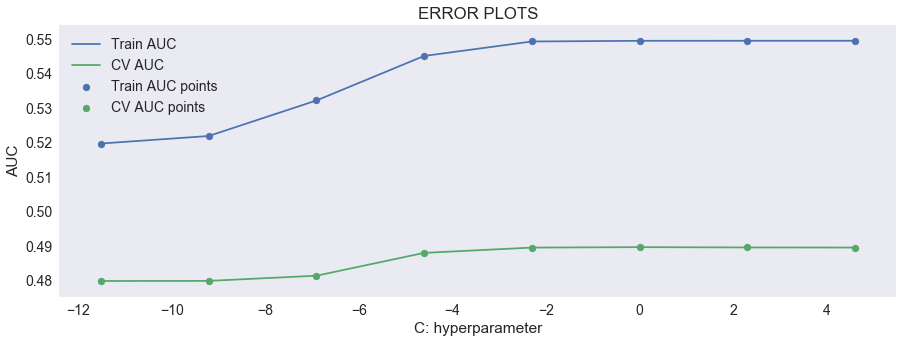

In [160]:
bestC( xtr5, xcv5, ytrain, ycv )

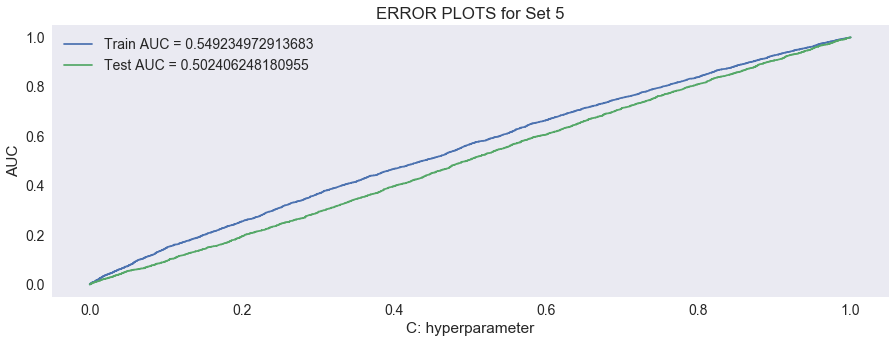

Confusion Matrix for Train of Set  5
 The maximum value of tpr*(1-fpr) =  0.28418439062274997  for threshold =  0.498
[[1865 1598]
 [9116 9866]]


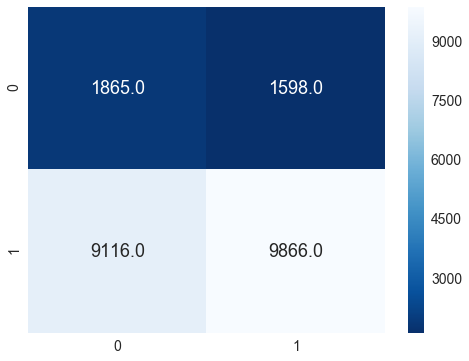



Confusion Matrix for Test 1 
 The maximum value of tpr*(1-fpr) =  0.25382186628019504  for threshold =  0.503
[[1345 1201]
 [7387 6567]]


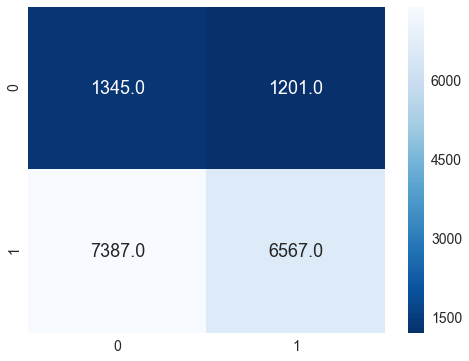

In [161]:
C = 10**-1

roc( xtr5, xte5, ytrain, ytest, C, 5 )

### Conclusions

In [164]:
from prettytable import PrettyTable
    
x = PrettyTable()


x.field_names = [" Set ", " Vectorizer ", " Best C ", " Train AUC ", " Test AUC "]

x.add_row( [ " Set 1 "," B.O.W ", " 10**-3 ", " 0.8027 ", " 0.6944 " ] ) 
x.add_row( [ " Set 2 "," TFIDF ", " 10**-1 ", " 0.8026 ", " 0.6789 " ] )
x.add_row( [ " Set 3 "," Avg W2V ", " 10**-2 ", " 0.6781 ", " 0.6124 " ] )
x.add_row( [ " Set 4 "," WW2V ", " 10**-3 ", " 0.6640 ", " 0.6140 " ] )
x.add_row( [ " Set 5 "," CountVect ", " 10**-1 ", " 0.5492 ", " 0.5020 " ] )


print( x )

+---------+--------------+----------+-------------+------------+
|   Set   |  Vectorizer  |  Best C  |  Train AUC  |  Test AUC  |
+---------+--------------+----------+-------------+------------+
|  Set 1  |    B.O.W     |  10**-3  |    0.8027   |   0.6944   |
|  Set 2  |    TFIDF     |  10**-1  |    0.8026   |   0.6789   |
|  Set 3  |   Avg W2V    |  10**-2  |    0.6781   |   0.6124   |
|  Set 4  |     WW2V     |  10**-3  |    0.6640   |   0.6140   |
|  Set 5  |  CountVect   |  10**-1  |    0.5492   |   0.5020   |
+---------+--------------+----------+-------------+------------+


B.O.W and TFIDF vectorizer approach gives the best result in Train AUC 

Out of all the other approaches B.O.W. approach has the highest Test AUC

Test AUC of Avg Word 2 Vec and Weighted Word 2 Vec vectorizer approaches are very close and Avg Word 2 Vec have higher Train AUC